In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import glob
glob.glob('2022*-divvy-tripdata.csv')


full_year = []
for one_filename in glob.glob('2022*-divvy-tripdata.csv'):
    print(f'Loading {one_filename}')
    new_df = pd.read_csv(one_filename, low_memory=False)
    full_year.append(new_df)


Loading 202207-divvy-tripdata.csv
Loading 202208-divvy-tripdata.csv
Loading 202209-divvy-tripdata.csv
Loading 202210-divvy-tripdata.csv
Loading 202211-divvy-tripdata.csv
Loading 202212-divvy-tripdata.csv


In [2]:
df = pd.concat(full_year)
df.drop(['end_station_id','end_station_name', 'start_station_id', 'start_station_name'
], axis=1, inplace=True)
df.drop(['start_lat','start_lng','end_lat','end_lng'], axis=1, inplace=True)
df.shape

(3388985, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3388985 entries, 0 to 181805
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ride_id        object
 1   rideable_type  object
 2   started_at     object
 3   ended_at       object
 4   member_casual  object
dtypes: object(5)
memory usage: 155.1+ MB


In [4]:
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3388985 entries, 0 to 181805
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 155.1+ MB


In [5]:
df['ride_length'] = df['ended_at'] - df['started_at']
df['weekday'] = df['started_at'].dt.day_name()
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,weekday
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,member,0 days 00:11:45,Tuesday
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,casual,0 days 00:01:53,Tuesday
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,casual,0 days 00:07:43,Sunday
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,casual,0 days 00:58:29,Sunday
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,member,0 days 00:26:18,Wednesday


In [6]:
df.isnull()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,weekday
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
181801,False,False,False,False,False,False,False
181802,False,False,False,False,False,False,False
181803,False,False,False,False,False,False,False
181804,False,False,False,False,False,False,False


In [7]:
pd.value_counts(df['weekday'])

Saturday     567505
Friday       505119
Thursday     495443
Wednesday    486129
Tuesday      459214
Sunday       446362
Monday       429213
Name: weekday, dtype: int64

In [8]:
pd.value_counts(df['member_casual'])

member    1972654
casual    1416331
Name: member_casual, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns



Text(0.5, 1.0, 'Amount of Riders per Day')

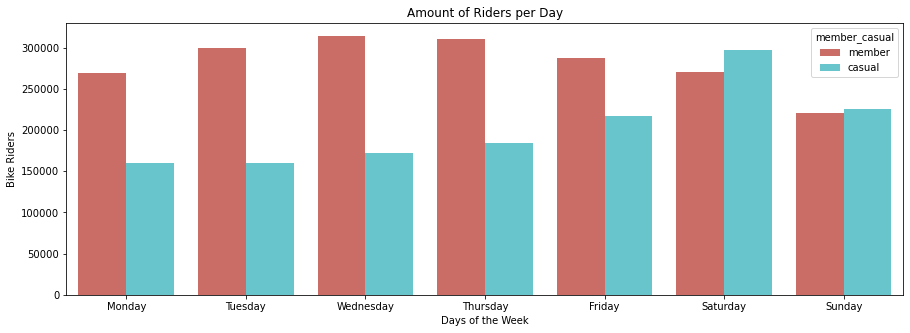

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(x="weekday",hue="member_casual",data=df,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],palette="hls")
plt.xlabel('Days of the Week')
plt.ylabel('Bike Riders')
plt.title('Amount of Riders per Day')

In [11]:
df['minutes'] = df['ride_length'].dt.total_seconds().div(60).astype(int)
df.head()


,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,weekday,minutes
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,member,0 days 00:11:45,Tuesday,11
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,casual,0 days 00:01:53,Tuesday,1
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,casual,0 days 00:07:43,Sunday,7
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,casual,0 days 00:58:29,Sunday,58
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,member,0 days 00:26:18,Wednesday,26


<AxesSubplot:xlabel='rideable_type', ylabel='count'>

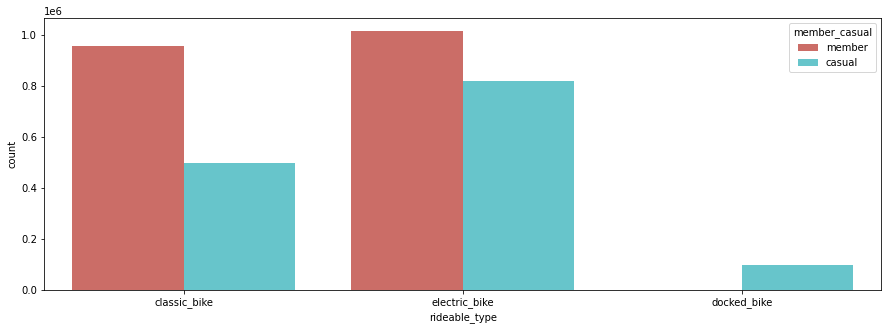

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(x="rideable_type",hue="member_casual",data=df,palette="hls")

Text(0.5, 1.0, 'Average Duration per Day')

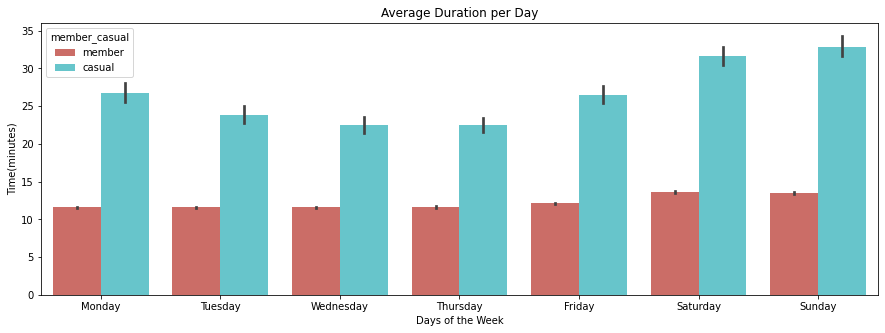

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(y="minutes",x="weekday",hue="member_casual",data=df,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],palette='hls')
plt.xlabel('Days of the Week')
plt.ylabel('Time(minutes)')
plt.title('Average Duration per Day')

In [14]:
pd.value_counts(df['rideable_type'])

electric_bike    1836480
classic_bike     1454876
docked_bike        97629
Name: rideable_type, dtype: int64

Text(0.5, 1.0, 'Amount of Bike Riders')

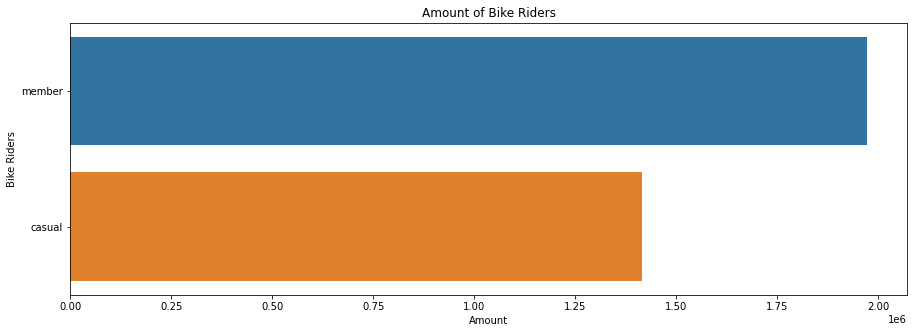

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(y="member_casual",data=df)
plt.xlabel('Amount')
plt.ylabel('Bike Riders')
plt.title('Amount of Bike Riders')